In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.preprocessing import PowerTransformer

In [545]:
df = pd.read_csv("USA_cars_datasets.csv",index_col=0)

In [546]:
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [547]:
df.isna().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [548]:
df.dtypes

price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [549]:
df = df[['price','year','mileage']]

In [550]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['price'],axis=1),df["price"],train_size = 0.25,random_state = 0)

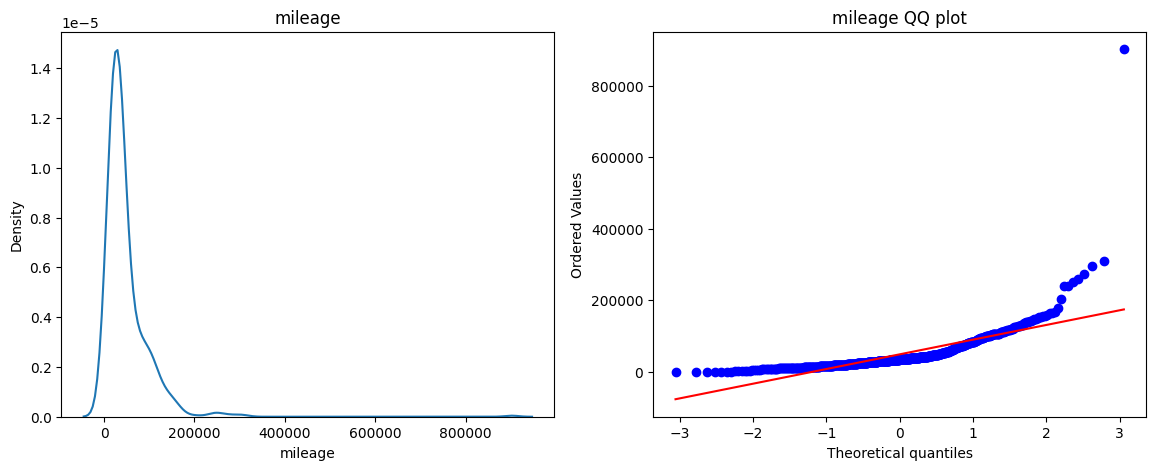

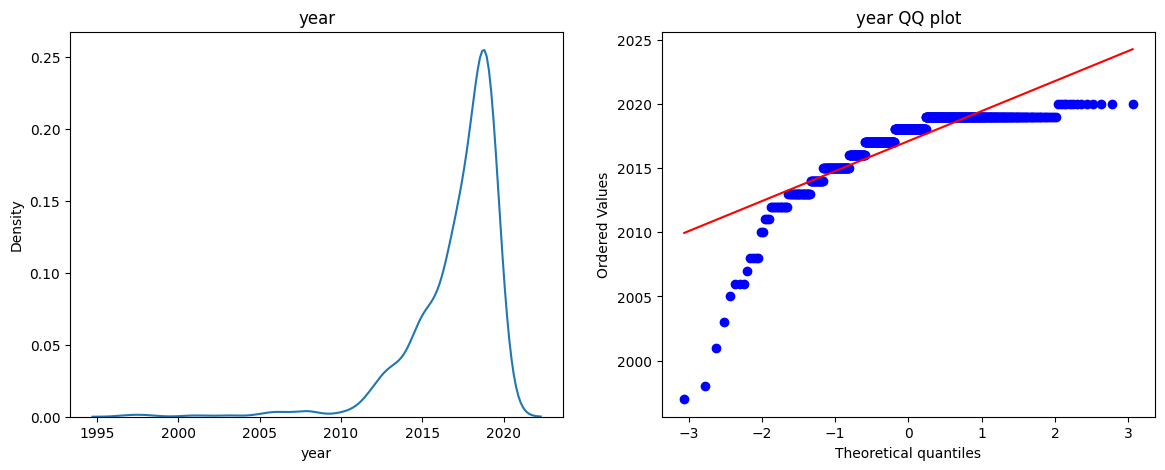

In [551]:
for i in ["mileage","year"]:       
        plt.figure(figsize=(14,5))
        plt.subplot(121)    
        sns.kdeplot(X_train[f"{i}"])
        plt.title(f"{i}")

        plt.subplot(122)
        st.probplot(X_train[f"{i}"], dist="norm", plot=plt)
        plt.title(f"{i} QQ plot")

        plt.show()

In [552]:
boco = PowerTransformer(standardize=False)
X_transformed = boco.fit_transform(X_train+0.0001)
X_test_transformed = boco.fit(X_test+0.0001)

X_transformed = pd.DataFrame(X_transformed,columns=X_train.columns)


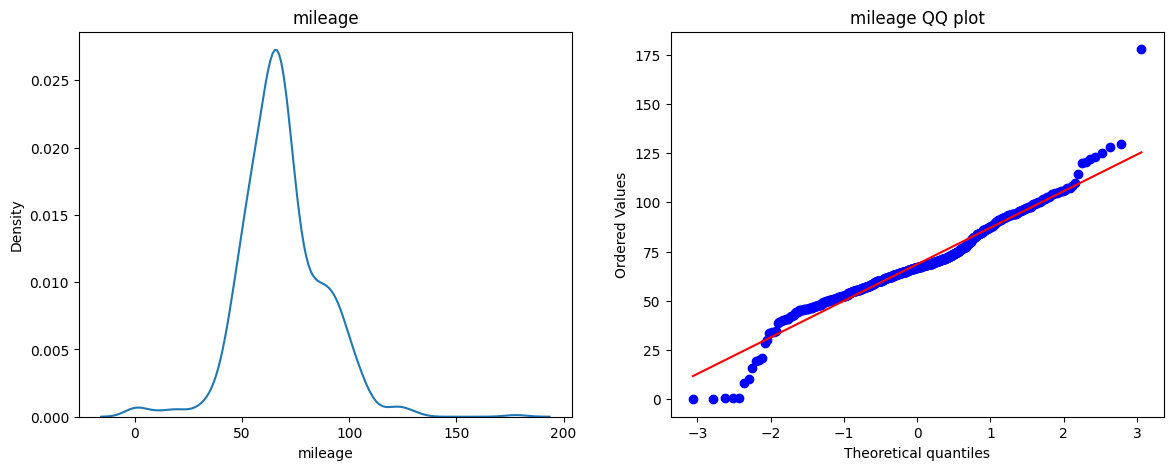

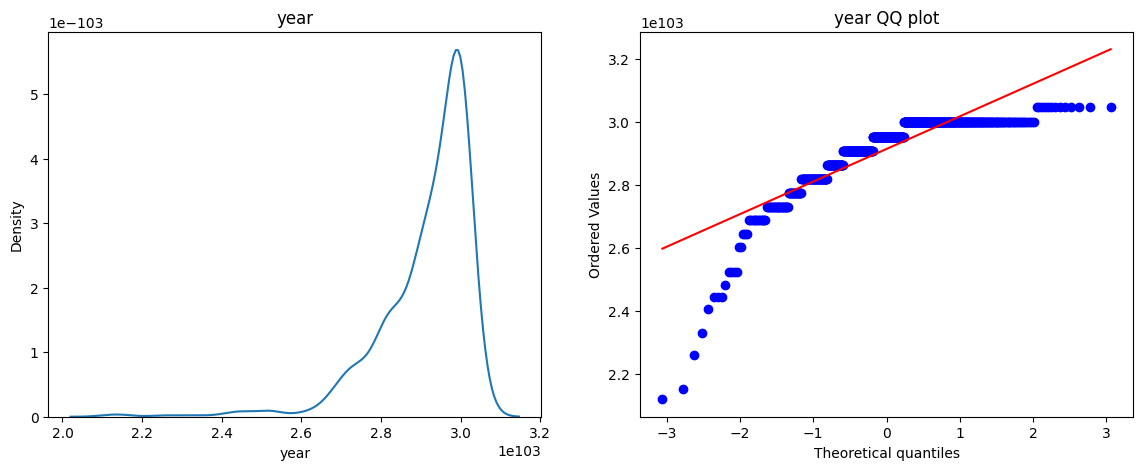

In [553]:
for i in ["mileage","year"]:       
        plt.figure(figsize=(14,5))
        plt.subplot(121)    
        sns.kdeplot(X_transformed[f"{i}"])
        plt.title(f"{i}")

        plt.subplot(122)
        st.probplot(X_transformed[f"{i}"], dist="norm", plot=plt)
        plt.title(f"{i} QQ plot")

        plt.show()

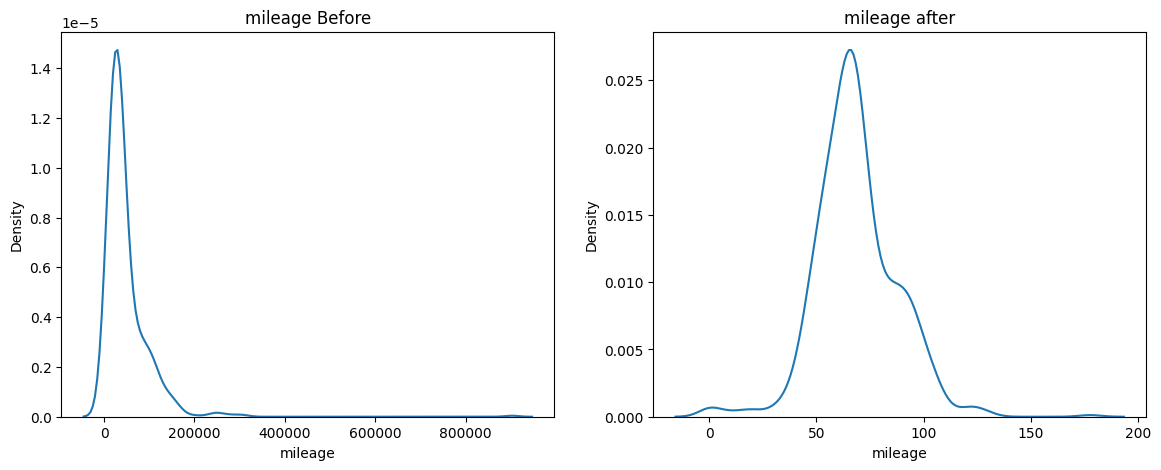

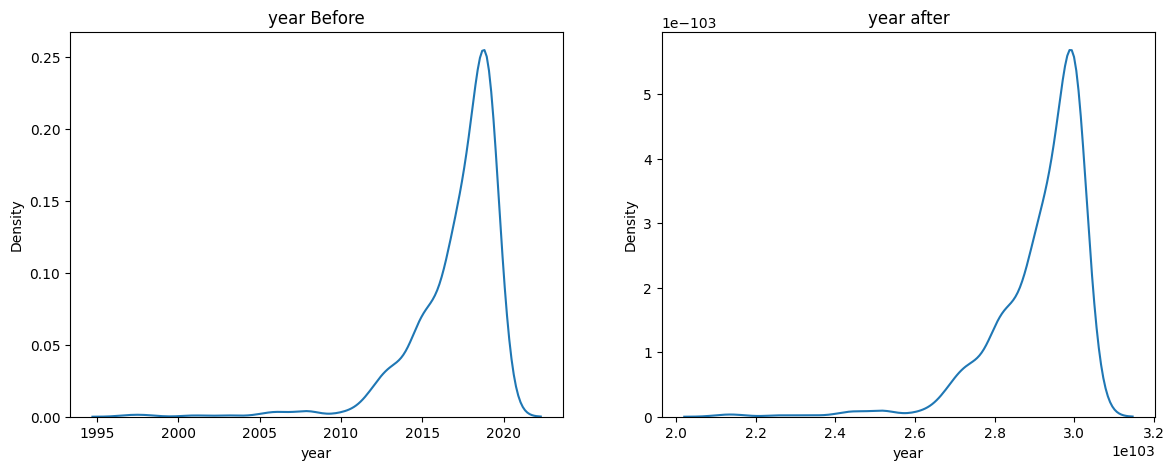

In [554]:
for i in ["mileage","year"]:       
        plt.figure(figsize=(14,5))
        plt.subplot(121)    
        sns.kdeplot(X_train[f"{i}"])
        plt.title(f"{i} Before")
        
        plt.subplot(122)
          
        sns.kdeplot(X_transformed[f"{i}"])
        plt.title(f"{i} after")

        # st.probplot(X_transformed[f"{i}"], dist="norm", plot=plt)
        # plt.title(f"{i} before QQ plot")

      
        # st.probplot(X_train[f"{i}"], dist="norm", plot=plt)
        # plt.title(f"{i} after  QQ plot")

        plt.show()

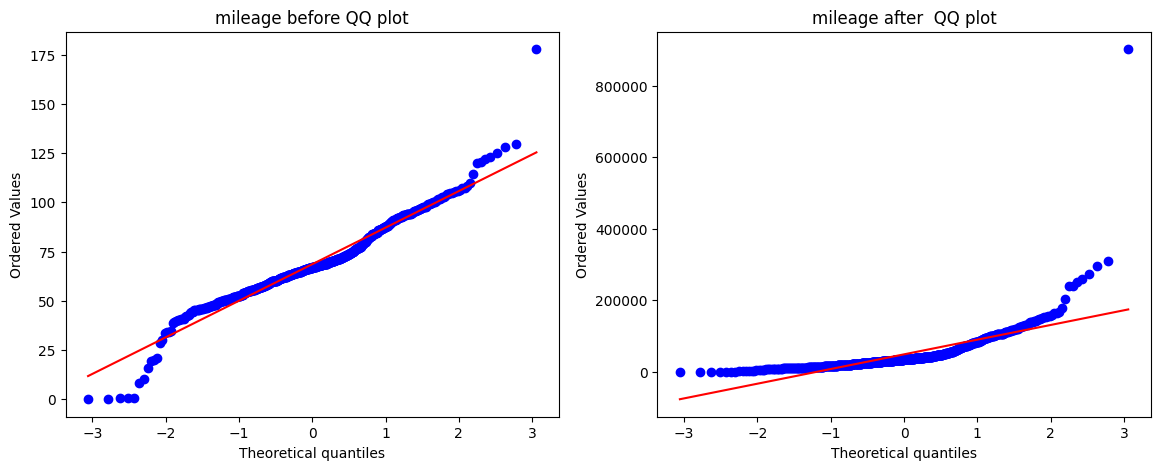

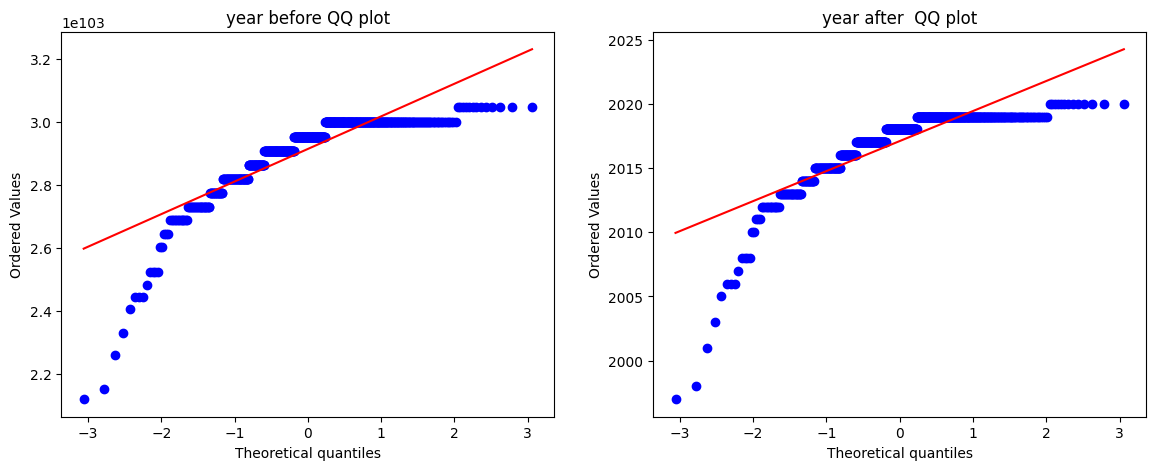

In [555]:
for i in ["mileage","year"]:       
        plt.figure(figsize=(14,5))
        # sns.kdeplot(X_train[f"{i}"])
        # plt.title(f"{i} Before")
        
          
        # sns.kdeplot(X_transformed[f"{i}"])
        plt.subplot(121)    
        # plt.title(f"{i} after")

        st.probplot(X_transformed[f"{i}"], dist="norm", plot=plt)
        plt.title(f"{i} before QQ plot")

        plt.subplot(122)
      
        st.probplot(X_train[f"{i}"], dist="norm", plot=plt)
        plt.title(f"{i} after  QQ plot")

        plt.show()